# Introdução

Neste Notebook, os dados de imóveis serão explorados (EDA), passarão pelo processo de ETL (Extract, Transform and Load, para um novo dataframe) e um modelo de aprendizado de máquina será treinado, o objetivo deste trabalho é criar um modelo para previsão do preço de um imóvel com base em suas características físicas.

O Primeiro passo será fazer a Análise Exploratória dos Dados (EDA), o objetivo dessa fase é entender os dados e entender quais transformações devem ser feitas antes de servir os dados no treinamento do modelo

## Carregando os Dados

In [1]:
import json
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import backend as K

from helper_functions import clean_df, plotCorrelationMatrix

O Primeiro passo é carregar os dados do arquivo JSON para um dataframe Pandas.

In [2]:
df_train = pd.read_json(r'source-4-ds-train.json', lines=True)
df_test = pd.read_json(r'source-4-ds-test.json', lines=True)
n_ent = len(df_train)
df_train.head()

,address,bathrooms,bedrooms,createdAt,description,id,images,listingStatus,owner,parkingSpaces,pricingInfos,publicationType,publisherId,suites,title,totalAreas,unitTypes,updatedAt,usableAreas
0,"{'country': 'BR', 'zipCode': '04290030', 'city...",3.0,4.0,2017-02-07T13:21:40Z,"04 dorms sendo 01 suÃ­te e closet, sala de est...",787c7bd19d,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,6.0,"{'price': 700000, 'businessType': 'SALE'}",STANDARD,f4603b2b52,1.0,PRÃ“XIMO A AVENIDA PRESIDENTE TANCREDO NEVES,388.0,TWO_STORY_HOUSE,2018-12-06T19:27:12.623Z,388.0
1,"{'country': 'BR', 'zipCode': '04187320', 'city...",2.0,3.0,2016-03-21T18:35:17Z,"03 dorms sendo 01 suÃ­te, sala, sala de jantar...",4d68c0cdbe,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,2.0,"{'price': 336000, 'businessType': 'SALE'}",STANDARD,f4603b2b52,1.0,PRÃ“XIMO A FACULDADE UNIP CAMPUS ANCHIETA,129.0,HOME,2018-12-12T13:17:23.547Z,129.0
2,"{'country': '', 'zipCode': '01311000', 'city':...",4.0,0.0,2018-12-18T23:47:03.425Z,"Andar com 395,70mÂ² de Ã¡rea Ãºtil, 04 wcs, 05...",e7e0b554ac,[http://static.nidoimovel.com.br/d3d9446802a44...,ACTIVE,False,5.0,"{'period': 'MONTHLY', 'yearlyIptu': 4040, 'pri...",STANDARD,501f6d5e94,0.0,Excelente Conjunto Comercial na Av. Paulista,NaN,COMMERCIAL_PROPERTY,NaN,396.0
3,"{'country': '', 'zipCode': '04550004', 'city':...",2.0,3.0,2018-10-26T16:18:28.915Z,"Viva melhor e de um jeito novo, com privilÃ©gi...",6654d93423,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,2.0,"{'yearlyIptu': 1610, 'price': 739643, 'busines...",STANDARD,527c7b0cc0,1.0,"Apartamento com 80mÂ², 2 vagas prÃ³ximo ao Par...",80.0,APARTMENT,2018-11-08T16:38:35.434Z,80.0
4,"{'country': '', 'zipCode': '04005030', 'city':...",5.0,4.0,2018-12-14T18:06:51.342Z,Sua Ã¡rea Ã© ocupada majoritariamente por inst...,9ffaf676ae,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,5.0,"{'yearlyIptu': 18900, 'price': 7520099, 'busin...",STANDARD,527c7b0cc0,4.0,"Apartamento 332mÂ², 4 suÃ­tes Ã venda prÃ³xim...",332.0,APARTMENT,2018-12-14T18:06:55.140Z,3322.0


Esse conjunto de dados têm várias colunas com dados que agregam pouco ou nenhum valor à análise de valor do imóvel. A descrição por exemplo, é uma string sem qualquer padronização, isso a torna uma feature ruim para usar em modelos de machine learning mais simples. publicationType, publisherId e listingStatus são outros exemplos.
As imagens poderiam, eventualmente, ser usadas mas aumentaria a complexidade do modelo, portatnto, essa feature também ficará de fora.

In [3]:
print(f'Antes da seleção de dados para análise e limpeza, o total de entradas é {n_ent}')
# A função clean_df está em arquivo separado, isso é feito para facilitar a leitura do notebook
df_train = clean_df(df_train)
df_test = clean_df(df_test)
print(f'Após o processamento, sobram {len(df_train)} entradas, {(1 - len(df_train)/n_ent)*100:.2f}% dos dados foram perdidos')
df_train.head()

Antes da seleção de dados para análise e limpeza, o total de entradas é 133964
Após o processamento, sobram 84092 entradas, 37.23% dos dados foram perdidos


,id,latitude,longitude,price,n_bathrooms,n_bedrooms,n_suites,parking_spaces,total_area,usable_area,tipo
0,787c7bd19d,-23.612923,-46.614222,700000,3.0,4.0,1.0,6.0,388.0,388.0,TWO_STORY_HOUSE
1,4d68c0cdbe,-23.643962,-46.593475,336000,2.0,3.0,1.0,2.0,129.0,129.0,HOME
2,6654d93423,-23.598023,-46.682781,739643,2.0,3.0,1.0,2.0,80.0,80.0,APARTMENT
3,9ffaf676ae,-23.582497,-46.653027,7520099,5.0,4.0,4.0,5.0,332.0,3322.0,APARTMENT
4,4d96835e38,-23.603692,-46.673550,1889,0.0,1.0,1.0,1.0,45.0,45.0,FLAT


In [4]:
print(df_train.tipo.value_counts(),'\n')
print(f'Existem {df_train.tipo.value_counts().count()} classes de imóvel nesse banco de dados')

APARTMENT                     41119
TWO_STORY_HOUSE               14292
HOME                           6440
FLAT                           5165
OFFICE                         4938
COMMERCIAL_PROPERTY            3676
CONDOMINIUM                    3041
PENTHOUSE                      1685
SHED_DEPOSIT_WAREHOUSE         1298
RESIDENTIAL_ALLOTMENT_LAND      791
BUSINESS                        422
STORE                           398
COMMERCIAL_ALLOTMENT_LAND       395
KITNET                          193
RESIDENTIAL_BUILDING            117
COMMERCIAL_BUILDING              84
CLINIC                           31
COUNTRY_HOUSE                     6
FARM                              1
Name: tipo, dtype: int64 

Existem 19 classes de imóvel nesse banco de dados


Essa feature é do tipo classe, para treinar um modelo para prever o valor de cada classe, precisa-se de quantidade expressiva de dados para cada classe.
Existem 19 classes de imóveis, alguns, como fazendas e clínicas, possuem quantidade de anúncios muito pequenas para treinamento de um modelo, portanto, apenas algumas serão selecionadas.
Apenas os dados de APARTMENT, TWO_STORY_HOUSE, HOME, FLAT e OFFICE serão utilizandos para criar o modelo.

In [5]:
df_train = df_train[(df_train.tipo == 'APARTMENT') | (df_train.tipo ==  'TWO_STORY_HOUSE') | \
   (df_train.tipo ==  'HOME') | (df_train.tipo ==  'FLAT') | (df_train.tipo ==  'OFFICE')]

df_test = df_test[(df_test.tipo == 'APARTMENT') | (df_test.tipo ==  'TWO_STORY_HOUSE') | \
   (df_test.tipo ==  'HOME') | (df_test.tipo ==  'FLAT') | (df_test.tipo ==  'OFFICE')]


print(f'Agora restam {len(df_train)} entradas para treinamento e {len(df_test)} entradas para teste')

Agora restam 71954 entradas para treinamento e 9271 entradas para teste


Outro problema que é possível observar nos dados, é existência valores igual a zero nos campos usable_area e total_area, esses valores também precisam ser ecluído, é inconsistente uma casa com 0 m² de área construída

In [6]:
print(f"Existem {df_train[df_train.usable_area == 0].count()['id']} valores usable_area igual a zero no conjunto de dados")
print(f"Existem {df_train[df_train.total_area == 0].count()['id']} valores total_area igual a zero no conjunto de dados")
print('No conjunto de treinamento')

Existem 1698 valores usable_area igual a zero no conjunto de dados
Existem 5859 valores total_area igual a zero no conjunto de dados
No conjunto de treinamento


In [7]:
# Qualquer entrada com valor diferente de zero em usable_area e total_area será excluída
df_train = df_train[(df_train.usable_area != 0) & (df_train.total_area != 0)]
df_test = df_test[(df_test.usable_area != 0) & (df_test.total_area != 0)]
print(f'Agora restam {len(df_train)} entradas para treinamento e {len(df_test)} entradas para teste')

Agora restam 66095 entradas para treinamento e 8593 entradas para teste


## Visualização dos dados

É prudente visualizar todos os dados selecionados antes de criar um modelo, precisamos testar se esses dados realmente influenciam no preço e se seus valores estão corretos e/ou fazem sentido

#### Valor do imóvel

O valor médio de um imóvel é 660833.47
O menor valor de um imóvel é 140.00, isso só pode ser algum erro


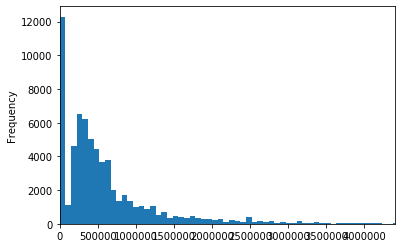

In [8]:
plt.xlim([0,4400000])
plot = df_train['price'].plot.hist(bins = 1000)
print(f"O valor médio de um imóvel é {df_train['price'].mean():.2f}")
print(f"O menor valor de um imóvel é {df_train['price'].min():.2f}, isso só pode ser algum erro")

No histograma acima notamos um dado estranho, existem imóveis com valor de 140 reais no banco de dados, isso só pode ser algum engano, talvez o valor do aluguel tenha sido inserido no lugar do valor do imóvel.

Por isso, mais dados precisam ser excluídos desse dataframe, excluiremos todos os dados com imóveis com valor menor que 25 mil, porque alguns excritórios pequenos podem ser encontrados a partir desse valor, e algumas casas ou apartamentos grandes podem ter alugueis superiores a 15 mil.

In [9]:
df_train = df_train[df_train.price > 25000]
print(f'Agora restam {len(df_train)} entradas para treinamento e {len(df_test)} entradas para teste')

Agora restam 54191 entradas para treinamento e 8593 entradas para teste


O valor médio de um imóvel é 804974.26
O menor valor de um imóvel é 25137.00


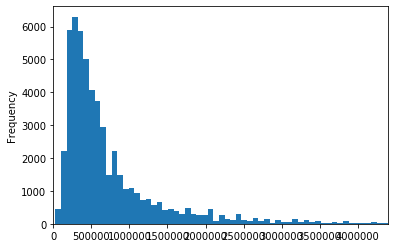

In [10]:
plt.xlim([0,4400000])
plot = df_train['price'].plot.hist(bins = 1000)
print(f"O valor médio de um imóvel é {df_train['price'].mean():.2f}")
print(f"O menor valor de um imóvel é {df_train['price'].min():.2f}")

#### Quantidade de quartos

A quantidade mais comum de um quartos por imóvel é :  3.0


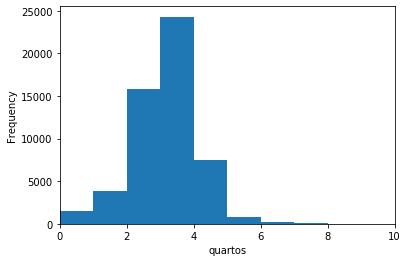

In [11]:
max_bedrooms = int(df_train['n_bedrooms'].max())
plot = df_train['n_bedrooms'].plot.hist(bins = max_bedrooms, xlim=(0,10))
plt.xlabel('quartos')
print("A quantidade mais comum de um quartos por imóvel é : ",df_train['n_bedrooms'].value_counts().idxmax())

#### Número de Banheiros

A quantidade mais comum de banheiros por imóvel é :  2.0


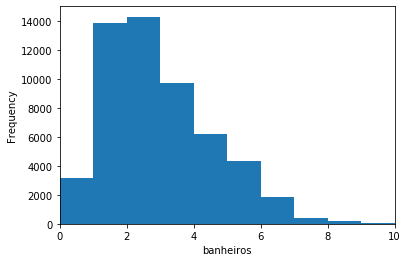

In [12]:
max_bathrooms = int(df_train['n_bathrooms'].max())
plot = df_train['n_bathrooms'].plot.hist(bins = max_bathrooms, xlim=(0,10))
plt.xlabel('banheiros')
print("A quantidade mais comum de banheiros por imóvel é : ",df_train['n_bathrooms'].value_counts().idxmax())

#### Quantidade de garagens

A quantidade mais comum de vagas para estacionamento por imóvel é :  1.0


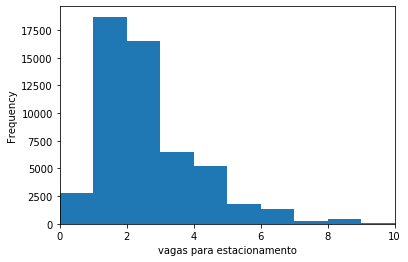

In [13]:
max_bedrooms = int(df_train['parking_spaces'].max())
plot = df_train['parking_spaces'].plot.hist(bins = max_bedrooms, xlim=(0,10))
plt.xlabel('vagas para estacionamento')
print("A quantidade mais comum de vagas para estacionamento por imóvel é : ", \
      df_train['parking_spaces'].value_counts().idxmax())

## Tratamento de Outliers

Outliers são normalmente o produto do preenchimento inadequado do formulário, esse valores precisam ser tratados antes do treinamento do modelo, ou podem trazer um impacto negativo as predições.

Por exemplo, o maior valor de área nos dados é

In [14]:
print(df_train['total_area'].max(), " m²")

1111111111.0  m²


Esse valor é equivalente a área de 10 campos de futebol, um imóvel com esse tamanho é muito improvável e traria danos à previsões de imóveis com tamanho mais realistas, por isso, precisa ser excluído

#### Eliminação de Outliers

Os Outliers serão eliminados, aqui precisa-se escolher números que façam sentido para o threshold, um gráfico de barras poderia ser de grande ajuda, entretanto, como estamos falando de imóveis, pode-se utilizar a intuição, então números exagerados para cada feature serão excluídos

In [15]:
df_train = df_train[(df_train.n_bathrooms < 10) & (df_train.n_bedrooms < 10) & (df_train.n_suites < 10) & \
        (df_train.total_area < 5000) & (df_train.usable_area < 5000) & (df_train.price < 10000000)]

df_test = df_test[(df_test.n_bathrooms < 10) & (df_test.n_bedrooms < 10) & (df_test.n_suites < 10) & \
        (df_test.total_area < 5000) & (df_test.usable_area < 5000)]

print(f'Agora restam {len(df_train)} entradas para treinamento e {len(df_test)} entradas para teste')

Agora restam 53769 entradas para treinamento e 8563 entradas para teste


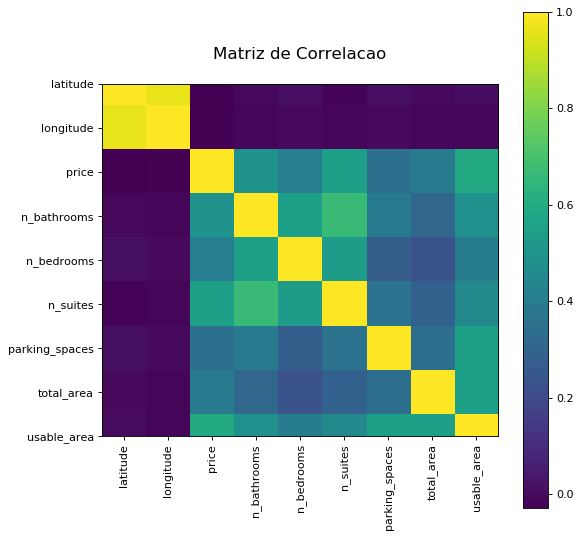

In [16]:
plotCorrelationMatrix(df_train,8)

Analisando a matriz de correlações, é possível perceber que latitude e longitude tem correlação fraca com o preço do imóvel, isso não significa que não existe relação entre preço e localização, significa apenas que não há uma relação linear entre as duas grandezas, i.e. ao subir no mapa, o preço do imóvel sobe. As relações entre preço e localizações são complexas.
Por outro lado, preço tem forte correlação com o número de suítes e com o tamanho da área usável do imóvel. Essas duas características tem forte correlação com o preço do imóvel, por outro lado, o número de estacionamentos do imóvel tem correlação positiva com o preço, mas bem mais fraca.
Essa informações são muito importantes na escolha de parâmetros de entrada para o modelo e avaliação dos dados.

## Preparando os dados para o uso em modelos de aprendizado de máquina

Os dados ainda não estão prontos para servir como entrada para um modelo, eles precisam ser normalizados, isso é feito para evitar que algumas features tenham peso maior na saída do modelo simplesmente por terem valores muito altos. Por exemplo, feature usable_area área tem vários valores acima de 1000, enquanto que o números de banheiros por imóvel é 2, na média, por isso o modelo poderia dar grande importância a primeira feature em detrimento da segunda.

Outro problema, é que a feature tipo é uma classe, ou seja, essa feature classifica cada imóvel. Não seria muito prático trabalhar com a string da classe para um modelo. Comumente é utilizada técnica chama de one-hot encoder para resolver esse problema, a técnica pode ser entendida observando-se a imagem abaixo 

Essa técmica será usada para que o modelo entenda a qual classe o imóvel pertence

#### One-hot Encoding

In [17]:
print("One-hot Encoding")
Image(url= "https://i.imgur.com/mtimFxh.png", width=500, height=500)

One-hot Encoding


In [18]:
def ohe(df): 
    
    df = pd.get_dummies(df['tipo'], drop_first=False)
    tipo_ohe = np.column_stack(([df['APARTMENT'].tolist(), df['FLAT'].tolist(), df['HOME'].tolist(), \
                df['OFFICE'].tolist(), df['TWO_STORY_HOUSE'].tolist()]))
    return tipo_ohe

def decode_tipo(ohe):
    
    lista_tipos = ['APARTMENT', 'FLAT', 'HOME', 'OFFICE', 'TWO_STORY_HOUSE']
    return lista_tipos[ohe.argmax()]

In [19]:
print('O primeiro item do dataframe é :')
print()
print(df_train.head(1))
print()
print(f"O primeiro item do dataframe terá seu tipo codigicado como ", ohe(df_train)[0])
print()
print('Após ser decodificado, seu tipo volta a ser  :', decode_tipo(ohe(df_train)[0]))
data_tipo_train = ohe(df_train)
print()
print('todos os valores do dataframe de teste são apartamentos')
data_tipo_test = []
for i in range(len(df_test)):
    data_tipo_test.append([1, 0, 0, 0, 0])

O primeiro item do dataframe é :

           id   latitude  longitude   price  n_bathrooms  n_bedrooms  \
0  787c7bd19d -23.612923 -46.614222  700000          3.0         4.0   

   n_suites  parking_spaces  total_area  usable_area             tipo  
0       1.0             6.0       388.0        388.0  TWO_STORY_HOUSE  

O primeiro item do dataframe terá seu tipo codigicado como  [0 0 0 0 1]

Após ser decodificado, seu tipo volta a ser  : TWO_STORY_HOUSE

todos os valores do dataframe de teste são apartamentos


#### Normalização dos Dados

O modelo verá todas as features como valores numéricos, e todos eles deverão ter um valor mínimo e máximo, idealmente, variando entre zero e um, Portanto todos os dados precisarão ser normalizados, menos o campo tipo, porque já está no formato correto.

No tratamento de outliers, todos os valores menores que zero e maiores do que um certo limiar, foram excluídos, para normalizar os dados para que eles estejam no intervalo [0, 1], precisamos então apenas divitir todos os valores desse conjunto de dados restante pelo seu respectivo limiar

Em um modelo mais robusto, a localização do imóvel deve ser considerada, entretanto, essa feature precisa ser transformada para ser usada no modelo e devido ao tempo curto, não foi possível fazer essa transformação de forma que não atrapalhe o treinamento do modelo.

In [20]:
# Como os arquivos de teste tem apenas apartamentos
# os dados de treinamento serão filtrados para ter apenas apartamentos
# para ter menos campos e obter melhores resultados nas predições do modelo

df_train = df_train[df_train.tipo == 'APARTMENT']

data_bathrooms_train = np.array(df_train['n_bathrooms'].tolist())/10
data_bedrooms_train = np.array(df_train['n_bedrooms'].tolist())/10
data_suites_train = np.array(df_train['n_suites'].tolist())/10
data_parking_spaces_train = np.array(df_train['parking_spaces'].tolist())/10
data_total_area_train = np.array(df_train['total_area'].tolist())/5000
data_usable_area_train = np.array(df_train['usable_area'].tolist())/5000

# devemos aplica os mesmos procedimentos no dataframe de teste

data_bathrooms_test = np.array(df_test['n_bathrooms'].tolist())/10
data_bedrooms_test = np.array(df_test['n_bedrooms'].tolist())/10
data_suites_test = np.array(df_test['n_suites'].tolist())/10
data_parking_spaces_test = np.array(df_test['parking_spaces'].tolist())/10
data_total_area_test = np.array(df_test['total_area'].tolist())/5000
data_usable_area_test = np.array(df_test['usable_area'].tolist())/5000

In [21]:
x_train = np.column_stack((data_bathrooms_train, data_bedrooms_train, data_suites_train, \
                         data_parking_spaces_train, data_total_area_train, data_usable_area_train))

x_test = np.column_stack((data_bathrooms_test, data_bedrooms_test, data_suites_test, \
                         data_parking_spaces_test, data_total_area_test, data_usable_area_test))


y_train = np.array(df_train['price'].tolist())

## Modelo para previsão de preços

O único modelo testado aqui, será com uma rede neural utilizando Keras/Tensorflow, os modelos 'fully-connected' são de uso geral para aproximar funções não lineares (como esse data-set), como eu discuto nesse notebook https://github.com/alvaroqueiroz/TFRegression/blob/master/Regression.ipynb se essas redes possuírem função de ativação adequadas, elas podem aproximar funções não lineares com precisão arbitrária.

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(6,), activation=tf.nn.elu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.elu))
model.add(tf.keras.layers.Dense(30, activation=tf.nn.elu))
model.add(tf.keras.layers.Dense(40, activation=tf.nn.elu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.elu))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer =tf.keras.optimizers.Adam(lr=0.0001), loss = 'mean_squared_error', 
          metrics=['mae'])
model.summary()

W0731 23:44:48.821890 15104 deprecation.py:506] From c:\users\alvar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
______________________________________________________

In [23]:
history = model.fit(x=x_train, y=y_train, epochs=200, verbose = 0)

In [24]:
model.save('model')

In [25]:
result = pd.DataFrame({
    'id': df_test.id.tolist(),
    'price': model.predict(x_test).tolist()
}) 
result.head()
result.to_csv (r'C:\Users\alvar\OneDrive\Documentos Notebook\GitHub\ds-zap-challenge\precos.csv', index = None, header=True)


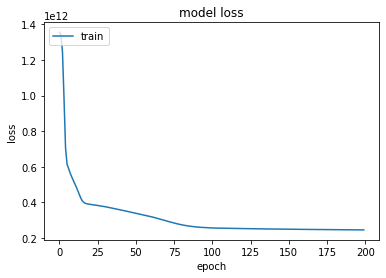

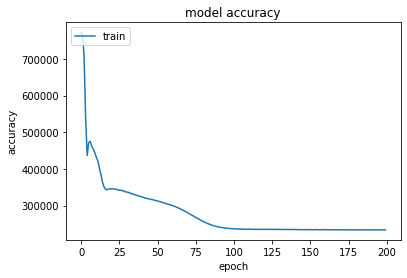

In [26]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Resultados

Para analisar o modelo, será criado um dataframe com as informações do imóvel e o erro do modelo, com isso, podemos tirar informações dos imóveis com base no erro do modelo, para saber quais as características do imóveis com as melhores predições

In [39]:
y_model = model.predict(x_train).tolist()
y = y_train.tolist()
erro_pred = []
for i in range(len(y_model)):
    erro_pred.append(abs(y_model[i][0] - y[i]))
    

In [40]:
abs_erro_pred = y_model-y_train

result_df = pd.DataFrame({
    
    'erro_pred': erro_pred,
    'n_bathrooms': df_train['n_bathrooms'].tolist(),
    'n_bedrooms': df_train['n_bedrooms'].tolist(),
    'n_suites': df_train['n_suites'].tolist(),
    'parking_spaces': df_train['parking_spaces'].tolist(),
    'total_area': df_train['total_area'].tolist(),
    'usable_area': df_train['usable_area'].tolist()
}) 

result_df.head()

,erro_pred,n_bathrooms,n_bedrooms,n_suites,parking_spaces,total_area,usable_area
0,3.032115e+05,2.0,3.0,1.0,2.0,80.0,80.0
1,1.441583e+06,5.0,4.0,4.0,5.0,332.0,3322.0
2,2.671404e+05,4.0,4.0,3.0,2.0,141.0,141.0
3,4.594261e+05,0.0,4.0,4.0,3.0,188.0,188.0
4,4.159397e+04,2.0,2.0,0.0,1.0,69.0,69.0


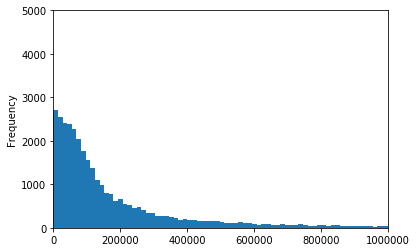

In [49]:
plot = result_df['erro_pred'].plot.hist(bins = 1000)
plt.axis([0, 1000000, 0, 5000]);

A quantidade mais comum de um quartos por imóvel é :  2.0


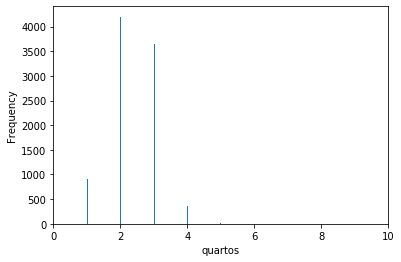

In [51]:
df_plot = result_df[result_df.erro_pred < 50000]
plot = df_plot['n_bedrooms'].plot.hist(bins = max_bedrooms, xlim=(0,10))
plt.xlabel('quartos')

Text(0.5, 0, 'banheiros')

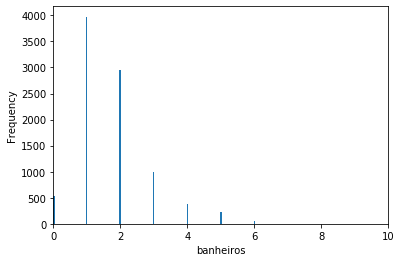

In [52]:
plot = df_plot['n_bathrooms'].plot.hist(bins = max_bedrooms, xlim=(0,10))
plt.xlabel('banheiros')

Text(0.5, 0, 'banheiros')

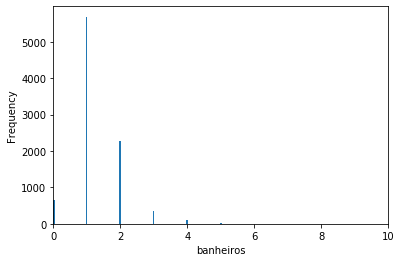

In [53]:
plot = df_plot['parking_spaces'].plot.hist(bins = max_bedrooms, xlim=(0,10))
plt.xlabel('quantidade de garagens')

## Conclusão

#### A métrica para escolha do modelo é adequada para comunicar os resultados aos stakeholders?

Não, Esse foi um primeiro modelo, outros modelos devem ser empregados e comparados, modelos esemble, árvores de decisão, random forests e etc. Outra abordagem que precisa ser feita é a otimização de hyperparametros do modelo, como quantidade de camadas, número de nós em cada camada e taxa de aprendizado. O modelo está longe de ser o melhor possível, no projeto https://github.com/alvaroqueiroz/FashionMNISTclass-Hyperparameter-Optimization/blob/master/FashionMNIST_paramOpt.ipynb eu mostro como otiização de hyperparametros pode ser feita com otimização Bayesiana.

#### Em quais bairros ou em quais faixas de preço o seu modelo performa melhor?

Esse tipo de modelo é muito dependente de dados, quanto mais dados de cada categoria, melhor serão as predições dos preços, por isso, um bom chute seria que as melhores predições seriam feitas em apartamentos com 2 ou 3 quartos, 1 ou 2 banheiros e 1 ou 2 vagas para estacionamento, ou seja, um apartamento médio do banco de dados, e como foi mostrado na sessão resultados, isso é exatamente o que se verifica.

#### Se você tivesse que estimar o valor dos imóveis com apenas 3 campos, quais seriam eles?

Olhando pela matriz de correlação, os 3 parâmetros que podem influenciar mais no preço são : área usável, número de quartos e suítes. Uma feature que combine latitude e longitude também tem potencial de ter grande impacto no preço do imóvel.

#### Como você vislumbra colocar a sua solução em produção?

Utilizando Amazon Web Services, O S3 poderia ser usado para abrigar o Data Lake, o ETL poderia ser implementado utilizando o AWS Glue ou Scripts em python poderiam ser escritos, após o ETL, os dados seriam alocados em Data Werehouse como o AWS Redshift, com os dados 'limpos', poderia-se servir o modelo no AWS Deep Learning AMI